Hariharan V S - 24BAD030
194.75201293568435 13.955357857671883 0.0793694719492467
                       Feature      Coef
0                        study  1.560753
1                       attend  0.310023
2  parental level of education -1.132443
3      test preparation course -3.396613
4                        sleep -0.491398
0.07935069110948878 0.07912230680657195


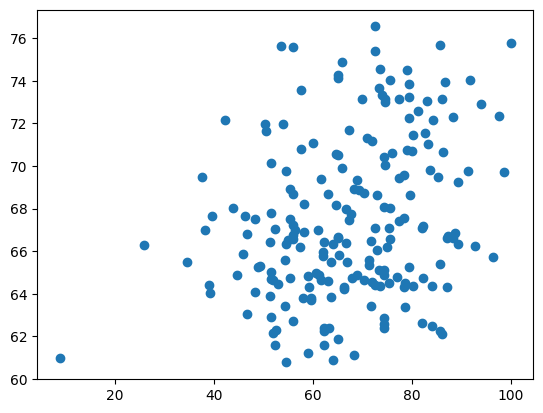

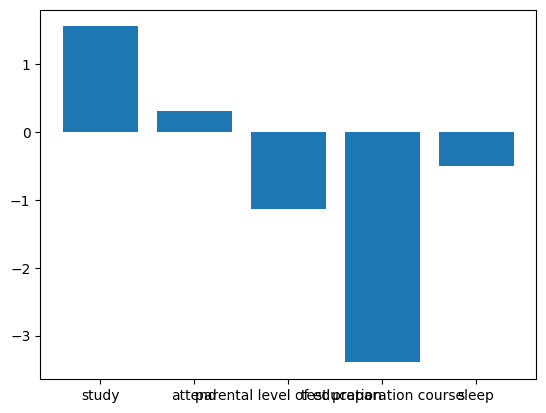

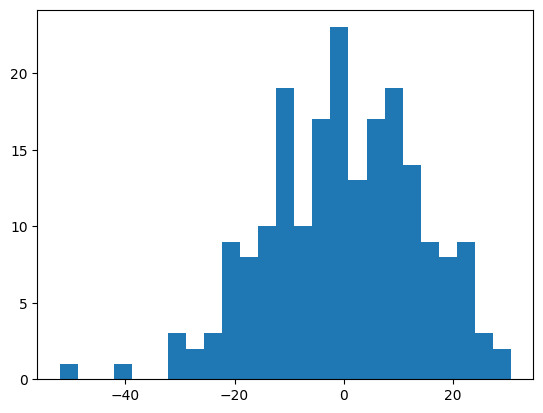

In [6]:
print('Hariharan V S - 24BAD030')
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("/content/StudentsPerformance.csv")
le = LabelEncoder()
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])

df['final'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

np.random.seed(1)
df[['study','attend','sleep']] = np.c_[
    np.random.randint(1,8,len(df)),
    np.random.randint(60,100,len(df)),
    np.random.randint(4,9,len(df))
]

features = ['study','attend','parental level of education','test preparation course','sleep']
X = df[features]
y = df['final']

X = StandardScaler().fit_transform(SimpleImputer().fit_transform(X))
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=1)

lr = LinearRegression().fit(Xtr, ytr)
yp = lr.predict(Xte)

print(mean_squared_error(yte, yp),
      np.sqrt(mean_squared_error(yte, yp)),
      r2_score(yte, yp))

print(pd.DataFrame({'Feature':features,'Coef':lr.coef_}))

print(r2_score(yte, Ridge().fit(Xtr,ytr).predict(Xte)),
      r2_score(yte, Lasso(0.1).fit(Xtr,ytr).predict(Xte)))

plt.scatter(yte, yp); plt.show()
plt.bar(features, lr.coef_); plt.show()
plt.hist(yte-yp, bins=25); plt.show()